In [1]:
#%store -r kings_player_shooting_salary
#kings_player_shooting_salary

In [2]:
import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [3]:
#aquring links in raw form
url = "https://www.espn.com/nba/teams"
result = requests.get(url)
soup = BeautifulSoup(result.text, 'html.parser')
links = [str(link.get('href')) for link in soup.find_all("a")]
links_df = pd.DataFrame(links)
links_df.columns = ["links"]
pattern = re.compile(r'/nba/team/stats/_/name/+')
stats_links_df = links_df[links_df['links'].str.contains(pattern, regex = True)]
print(links_df)
stats_links_df

                                                 links
0                                                 None
1                                                    /
2                                                /nfl/
3                                   /college-football/
4                                                /nhl/
..                                                 ...
246              http://www.nielsen.com/digitalprivacy
247  https://privacy.thewaltdisneycompany.com/en/dn...
248  https://www.espn.com/espn/news/story?page=cont...
249                         https://disneyadsales.com/
250                https://jobs.disneycareers.com/espn

[251 rows x 1 columns]


,links
27,/nba/team/stats/_/name/bos/boston-celtics
34,/nba/team/stats/_/name/bkn/brooklyn-nets
41,/nba/team/stats/_/name/ny/new-york-knicks
48,/nba/team/stats/_/name/phi/philadelphia-76ers
55,/nba/team/stats/_/name/tor/toronto-raptors
62,/nba/team/stats/_/name/chi/chicago-bulls
69,/nba/team/stats/_/name/cle/cleveland-cavaliers
76,/nba/team/stats/_/name/det/detroit-pistons
83,/nba/team/stats/_/name/ind/indiana-pacers
90,/nba/team/stats/_/name/mil/milwaukee-bucks


In [4]:
stats_links_df = stats_links_df.reset_index().drop("index", axis = "columns")
west_conference = pd.concat([stats_links_df.iloc[10:20,:],stats_links_df.iloc[25:,:]])
west_conference_stats_links = west_conference.reset_index().drop("index", axis = "columns")
#links to team stats that are only in the western conference
west_conference_stats_links

,links
0,/nba/team/stats/_/name/den/denver-nuggets
1,/nba/team/stats/_/name/min/minnesota-timberwolves
2,/nba/team/stats/_/name/okc/oklahoma-city-thunder
3,/nba/team/stats/_/name/por/portland-trail-blazers
4,/nba/team/stats/_/name/utah/utah-jazz
5,/nba/team/stats/_/name/gs/golden-state-warriors
6,/nba/team/stats/_/name/lac/la-clippers
7,/nba/team/stats/_/name/lal/los-angeles-lakers
8,/nba/team/stats/_/name/phx/phoenix-suns
9,/nba/team/stats/_/name/sac/sacramento-kings


In [5]:
#Removing kings from links
west_conference_stats_links = west_conference_stats_links.drop(9, axis = "rows").reset_index().drop("index",axis = "columns")

In [6]:
#acquire raw data
players_df = pd.DataFrame()
for link in west_conference_stats_links["links"]:
    url = "https://www.espn.com"+link
    player_names = pd.read_html(url)[0]
    player_stats = pd.read_html(url)[1]
    player_concat = pd.concat([player_names,player_stats],axis = "columns")
    players_df = pd.concat([players_df, player_concat], ignore_index = True)

#Change this to "remove_positions(players_df) when notebooks are combined"
words = []
for i in players_df["Name"]:
    words.append(i.split()[0:2])
words = pd.DataFrame(words)
words.columns = ["First","Last"]
words["Names"] = words['First']+" "+ words["Last"]
words = words.drop("First", axis = 1).drop("Last", axis = 1)
players_df["Name"] = words
players_df = players_df.dropna().reset_index().drop("index", axis = "columns")
#Cleaned up dataframe with all player stats in western conference
pd.set_option('display.max_rows', None)
players_df


,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO
0,Nikola Jokic,20,20.0,32.2,23.2,2.0,8.2,10.1,8.9,1.3,0.6,3.3,3.0,2.7
1,Jamal Murray,19,19.0,29.8,17.9,0.5,3.2,3.7,4.9,0.9,0.3,2.0,1.3,2.5
2,Michael Porter,16,16.0,29.1,16.4,1.2,4.8,6.0,1.3,0.6,0.4,1.1,2.6,1.1
3,Aaron Gordon,20,20.0,29.2,16.1,2.4,4.3,6.7,2.3,0.7,0.9,1.4,1.8,1.6
4,Bones Hyland,15,0.0,20.5,14.1,0.3,1.7,1.9,3.3,0.6,0.3,1.8,1.6,1.9
5,Bruce Brown,23,11.0,30.0,11.2,1.0,3.5,4.5,4.5,1.1,0.5,1.9,2.4,2.4
6,Kentavious Caldwell-Pope,22,22.0,31.2,11.0,0.5,2.4,2.9,2.1,1.2,0.4,1.3,1.9,1.6
7,Jeff Green,16,3.0,19.9,7.9,0.8,1.8,2.6,1.2,0.4,0.2,1.0,2.1,1.2
8,Vlatko Cancar,15,0.0,12.7,5.3,0.3,1.4,1.7,0.9,0.5,0.3,0.5,1.5,1.8
9,DeAndre Jordan,19,3.0,15.7,5.3,1.6,4.3,5.9,1.0,0.2,0.6,1.3,1.6,0.8


In [7]:
players_df_shoot = pd.DataFrame()
for link in west_conference_stats_links["links"]:
    url = "https://www.espn.com"+link
    player_names = pd.read_html(url)[0]
    player_shoot = pd.read_html(url)[3]
    player_concat = pd.concat([player_names,player_shoot],axis = "columns")
    
    players_df_shoot = pd.concat([players_df_shoot, player_concat], ignore_index = True)

#Change this to "remove_positions(players_df_shoot) when notebooks are combined"
words = []
for i in players_df_shoot["Name"]:
    words.append(i.split()[0:2])
words = pd.DataFrame(words)
words.columns = ["First","Last"]
words["Names"] = words['First']+" "+ words["Last"]
words = words.drop("First", axis = 1).drop("Last", axis = 1)
players_df_shoot["Name"] = words
players_df_shoot = players_df_shoot.dropna().reset_index().drop("index", axis = "columns")
#Cleaned up dataframe with all player stats in western conference
players_df_shoot


,Name,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF
0,Nikola Jokic,8.7,13.7,63.5,0.8,2.4,34.0,5.0,6.2,80.6,7.9,11.4,69.6,1.693,0.66
1,Jamal Murray,6.8,15.5,44.2,2.0,5.3,38.0,2.3,2.9,78.2,4.8,10.2,47.4,1.160,0.51
2,Michael Porter,6.0,12.9,46.6,2.9,6.9,42.7,1.5,1.9,80.0,3.1,6.0,51.0,1.277,0.58
3,Aaron Gordon,6.2,10.2,60.8,1.1,2.8,37.5,2.7,4.2,63.1,5.2,7.4,69.6,1.578,0.66
4,Bones Hyland,4.6,11.5,39.9,2.7,6.1,43.5,2.2,2.7,80.5,1.9,5.4,35.8,1.220,0.51
5,Bruce Brown,4.5,9.5,47.2,1.3,3.4,39.7,0.9,1.0,87.5,3.1,6.1,51.4,1.183,0.54
6,Kentavious Caldwell-Pope,3.9,8.4,45.9,2.1,4.5,46.0,1.1,1.5,78.1,1.8,3.9,45.9,1.303,0.58
7,Jeff Green,2.9,5.6,52.8,0.3,1.3,25.0,1.8,2.3,77.8,2.6,4.3,60.9,1.427,0.56
8,Vlatko Cancar,2.0,4.3,46.9,0.9,2.3,41.2,0.4,0.5,85.7,1.1,2.0,53.3,1.250,0.58
9,DeAndre Jordan,2.3,3.0,75.4,0.1,0.1,100.0,0.7,1.6,46.7,2.2,2.9,75.0,1.772,0.76


In [8]:
#Next few cells are for acquiring salary of all players in western conference

url2 = "https://www.espn.com/nba/team/roster/_/name/sac/salary"
kings_salary_raw = pd.read_html(url2)[0]

pattern_sal = re.compile(r'/nba/team/roster/_/+')
sal_links_df = links_df[links_df['links'].str.contains(pattern_sal, regex = True)]


west_conference_sal = pd.concat([sal_links_df.iloc[10:20,:],sal_links_df.iloc[25:,:]])
west_conference_sal_links = west_conference_sal.reset_index().drop("index", axis = "columns")
#links to all pages with team salaries
west_conference_sal_links

,links
0,/nba/team/roster/_/name/den/denver-nuggets
1,/nba/team/roster/_/name/min/minnesota-timberwo...
2,/nba/team/roster/_/name/okc/oklahoma-city-thunder
3,/nba/team/roster/_/name/por/portland-trail-bla...
4,/nba/team/roster/_/name/utah/utah-jazz
5,/nba/team/roster/_/name/gs/golden-state-warriors
6,/nba/team/roster/_/name/lac/la-clippers
7,/nba/team/roster/_/name/lal/los-angeles-lakers
8,/nba/team/roster/_/name/phx/phoenix-suns
9,/nba/team/roster/_/name/sac/sacramento-kings


In [9]:
#Removed kings from links
west_conference_sal_links = west_conference_sal_links.drop(9, axis = "rows").reset_index().drop("index",axis = "columns")
west_conference_sal_links

,links
0,/nba/team/roster/_/name/den/denver-nuggets
1,/nba/team/roster/_/name/min/minnesota-timberwo...
2,/nba/team/roster/_/name/okc/oklahoma-city-thunder
3,/nba/team/roster/_/name/por/portland-trail-bla...
4,/nba/team/roster/_/name/utah/utah-jazz
5,/nba/team/roster/_/name/gs/golden-state-warriors
6,/nba/team/roster/_/name/lac/la-clippers
7,/nba/team/roster/_/name/lal/los-angeles-lakers
8,/nba/team/roster/_/name/phx/phoenix-suns
9,/nba/team/roster/_/name/dal/dallas-mavericks


In [10]:
#What the salary page returns; we only care about name and salary
pd.read_html("https://www.espn.com/nba/team/roster/_/name/den/denver-nuggets")

[    Unnamed: 0                       Name POS  Age      HT       WT  \
 0          NaN           Christian Braun0   G   21   6' 6"  220 lbs   
 1          NaN              Bruce Brown11  SF   26   6' 4"  202 lbs   
 2          NaN  Kentavious Caldwell-Pope5  SG   29   6' 5"  204 lbs   
 3          NaN            Vlatko Cancar31  SF   25   6' 8"  236 lbs   
 4          NaN         Collin Gillespie21   G   23   6' 1"  195 lbs   
 5          NaN             Aaron Gordon50  PF   27   6' 8"  235 lbs   
 6          NaN               Jeff Green32  PF   36   6' 8"  235 lbs   
 7          NaN              Bones Hyland3  PG   22   6' 2"  169 lbs   
 8          NaN             Nikola Jokic15   C   27  6' 11"  284 lbs   
 9          NaN            DeAndre Jordan6   C   34  6' 11"  265 lbs   
 10         NaN             Jamal Murray27  PG   25   6' 4"  215 lbs   
 11         NaN               Zeke Nnaji22  PF   21   6' 9"  240 lbs   
 12         NaN        Michael Porter Jr.1  SF   24  6' 10"  218

In [11]:
#Acquiring the salaries from the links
sal_players_df = pd.DataFrame()
for link in west_conference_sal_links["links"]:
    url = "https://www.espn.com"+link
    player_salaries = pd.read_html(url)[0]
    sal_players_df = pd.concat([sal_players_df, player_salaries], ignore_index = True)
sal_players_df

,Unnamed: 0,Name,POS,Age,HT,WT,College,Salary
0,NaN,Christian Braun0,G,21,"6' 6""",220 lbs,Kansas,"$2,808,600"
1,NaN,Bruce Brown11,SF,26,"6' 4""",202 lbs,Miami (FL),"$6,479,000"
2,NaN,Kentavious Caldwell-Pope5,SG,29,"6' 5""",204 lbs,Georgia,"$14,004,703"
3,NaN,Vlatko Cancar31,SF,25,"6' 8""",236 lbs,--,"$2,234,359"
4,NaN,Collin Gillespie21,G,23,"6' 1""",195 lbs,Villanova,--
5,NaN,Aaron Gordon50,PF,27,"6' 8""",235 lbs,Arizona,"$19,690,909"
6,NaN,Jeff Green32,PF,36,"6' 8""",235 lbs,Georgetown,"$4,500,000"
7,NaN,Bones Hyland3,PG,22,"6' 2""",169 lbs,Virginia Commonwealth,"$2,201,520"
8,NaN,Nikola Jokic15,C,27,"6' 11""",284 lbs,--,"$33,047,804"
9,NaN,DeAndre Jordan6,C,34,"6' 11""",265 lbs,Texas A&M,"$1,836,090"


In [12]:
#Cleaning
for i in range(0,len(sal_players_df)):
    sal_players_df.loc[:,"Name"][i] = re.sub(r"\d+", "", str(sal_players_df.loc[:,"Name"][i]))

/tmp/ipykernel_716/3537221818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_players_df.loc[:,"Name"][i] = re.sub(r"\d+", "", str(sal_players_df.loc[:,"Name"][i]))


In [13]:
#Cleaning
sal_players_df = sal_players_df.set_index("Name").drop('Unnamed: 0', axis = 1)
sal_players_df = sal_players_df.drop(['POS', 'Age', 'HT', 'WT', 'College'], axis = 1)
#Clean salary dataframe
sal_players_df

,Salary
Name,
Christian Braun,"$2,808,600"
Bruce Brown,"$6,479,000"
Kentavious Caldwell-Pope,"$14,004,703"
Vlatko Cancar,"$2,234,359"
Collin Gillespie,--
Aaron Gordon,"$19,690,909"
Jeff Green,"$4,500,000"
Bones Hyland,"$2,201,520"
Nikola Jokic,"$33,047,804"


In [14]:
#Merge western conference player stats with their salaries
players_stats_salary = pd.merge(players_df,sal_players_df, how = "left", on = "Name")
player_stats_shoot_salary = pd.merge(players_stats_salary, players_df_shoot, how = "left", on = "Name")
player_stats_shoot_salary
salary = player_stats_shoot_salary.pop("Salary")
player_stats_shoot_salary = pd.concat([player_stats_shoot_salary, salary], axis = 'columns')
player_stats_shoot_salary

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,...,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Salary
0,Nikola Jokic,20,20.0,32.2,23.2,2.0,8.2,10.1,8.9,1.3,...,34.0,5.0,6.2,80.6,7.9,11.4,69.6,1.693,0.66,"$33,047,804"
1,Jamal Murray,19,19.0,29.8,17.9,0.5,3.2,3.7,4.9,0.9,...,38.0,2.3,2.9,78.2,4.8,10.2,47.4,1.160,0.51,"$31,650,000"
2,Michael Porter,16,16.0,29.1,16.4,1.2,4.8,6.0,1.3,0.6,...,42.7,1.5,1.9,80.0,3.1,6.0,51.0,1.277,0.58,NaN
3,Aaron Gordon,20,20.0,29.2,16.1,2.4,4.3,6.7,2.3,0.7,...,37.5,2.7,4.2,63.1,5.2,7.4,69.6,1.578,0.66,"$19,690,909"
4,Bones Hyland,15,0.0,20.5,14.1,0.3,1.7,1.9,3.3,0.6,...,43.5,2.2,2.7,80.5,1.9,5.4,35.8,1.220,0.51,"$2,201,520"
5,Bruce Brown,23,11.0,30.0,11.2,1.0,3.5,4.5,4.5,1.1,...,39.7,0.9,1.0,87.5,3.1,6.1,51.4,1.183,0.54,"$6,479,000"
6,Kentavious Caldwell-Pope,22,22.0,31.2,11.0,0.5,2.4,2.9,2.1,1.2,...,46.0,1.1,1.5,78.1,1.8,3.9,45.9,1.303,0.58,"$14,004,703"
7,Jeff Green,16,3.0,19.9,7.9,0.8,1.8,2.6,1.2,0.4,...,25.0,1.8,2.3,77.8,2.6,4.3,60.9,1.427,0.56,"$4,500,000"
8,Vlatko Cancar,15,0.0,12.7,5.3,0.3,1.4,1.7,0.9,0.5,...,41.2,0.4,0.5,85.7,1.1,2.0,53.3,1.250,0.58,"$2,234,359"
9,DeAndre Jordan,19,3.0,15.7,5.3,1.6,4.3,5.9,1.0,0.2,...,100.0,0.7,1.6,46.7,2.2,2.9,75.0,1.772,0.76,"$1,836,090"


In [15]:
#replace all the "--" and NAN to 0
player_stats_shoot_salary['Salary'] = player_stats_shoot_salary['Salary'].replace("--", '0')
player_stats_shoot_salary['Salary'] = player_stats_shoot_salary['Salary'].replace(np.NaN, '0')
#remove $ and , signals
for i in range(0,len(player_stats_shoot_salary)):
    player_stats_shoot_salary['Salary'][i] = player_stats_shoot_salary['Salary'][i].lstrip('$')
    player_stats_shoot_salary['Salary'][i] = player_stats_shoot_salary['Salary'][i].replace(',','')
    #turn Salary to numbers
    player_stats_shoot_salary['Salary'][i] = int(player_stats_shoot_salary['Salary'][i])
#replace all 0 to NAN
player_stats_shoot_salary['Salary'] = player_stats_shoot_salary['Salary'].replace(0, np.NaN)
#drop all NAN
player_stats_shoot_salary_temp = player_stats_shoot_salary.dropna()


/tmp/ipykernel_716/720164291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_stats_shoot_salary['Salary'][i] = player_stats_shoot_salary['Salary'][i].lstrip('$')
/tmp/ipykernel_716/720164291.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_stats_shoot_salary['Salary'][i] = player_stats_shoot_salary['Salary'][i].replace(',','')
/tmp/ipykernel_716/720164291.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_s

In [16]:
#final dataset
pd.set_option('display.max_columns', None)

player_stats_shoot_salary_temp

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Salary
0,Nikola Jokic,20,20.0,32.2,23.2,2.0,8.2,10.1,8.9,1.3,0.6,3.3,3.0,2.7,8.7,13.7,63.5,0.8,2.4,34.0,5.0,6.2,80.6,7.9,11.4,69.6,1.693,0.66,33047804.0
1,Jamal Murray,19,19.0,29.8,17.9,0.5,3.2,3.7,4.9,0.9,0.3,2.0,1.3,2.5,6.8,15.5,44.2,2.0,5.3,38.0,2.3,2.9,78.2,4.8,10.2,47.4,1.160,0.51,31650000.0
3,Aaron Gordon,20,20.0,29.2,16.1,2.4,4.3,6.7,2.3,0.7,0.9,1.4,1.8,1.6,6.2,10.2,60.8,1.1,2.8,37.5,2.7,4.2,63.1,5.2,7.4,69.6,1.578,0.66,19690909.0
4,Bones Hyland,15,0.0,20.5,14.1,0.3,1.7,1.9,3.3,0.6,0.3,1.8,1.6,1.9,4.6,11.5,39.9,2.7,6.1,43.5,2.2,2.7,80.5,1.9,5.4,35.8,1.220,0.51,2201520.0
5,Bruce Brown,23,11.0,30.0,11.2,1.0,3.5,4.5,4.5,1.1,0.5,1.9,2.4,2.4,4.5,9.5,47.2,1.3,3.4,39.7,0.9,1.0,87.5,3.1,6.1,51.4,1.183,0.54,6479000.0
6,Kentavious Caldwell-Pope,22,22.0,31.2,11.0,0.5,2.4,2.9,2.1,1.2,0.4,1.3,1.9,1.6,3.9,8.4,45.9,2.1,4.5,46.0,1.1,1.5,78.1,1.8,3.9,45.9,1.303,0.58,14004703.0
7,Jeff Green,16,3.0,19.9,7.9,0.8,1.8,2.6,1.2,0.4,0.2,1.0,2.1,1.2,2.9,5.6,52.8,0.3,1.3,25.0,1.8,2.3,77.8,2.6,4.3,60.9,1.427,0.56,4500000.0
8,Vlatko Cancar,15,0.0,12.7,5.3,0.3,1.4,1.7,0.9,0.5,0.3,0.5,1.5,1.8,2.0,4.3,46.9,0.9,2.3,41.2,0.4,0.5,85.7,1.1,2.0,53.3,1.250,0.58,2234359.0
9,DeAndre Jordan,19,3.0,15.7,5.3,1.6,4.3,5.9,1.0,0.2,0.6,1.3,1.6,0.8,2.3,3.0,75.4,0.1,0.1,100.0,0.7,1.6,46.7,2.2,2.9,75.0,1.772,0.76,1836090.0
10,Zeke Nnaji,17,0.0,9.8,4.4,0.9,0.5,1.4,0.2,0.2,0.1,0.5,1.5,0.4,1.9,3.2,58.2,0.2,0.8,21.4,0.5,0.6,80.0,1.7,2.4,70.7,1.364,0.61,2498760.0


In [17]:
%store player_stats_shoot_salary_temp

Stored 'player_stats_shoot_salary_temp' (DataFrame)


### Correlations and Averages

<AxesSubplot:>

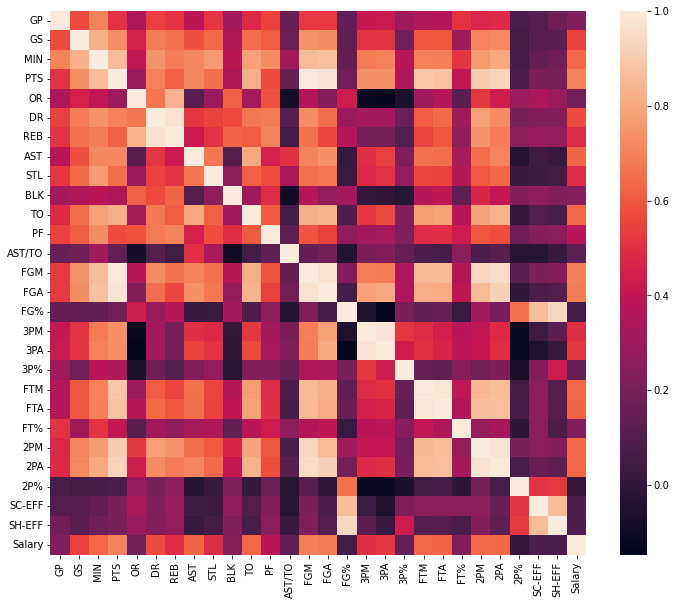

In [18]:
#setting up heatmap for correlations between all statistics
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
corr = player_stats_shoot_salary.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)

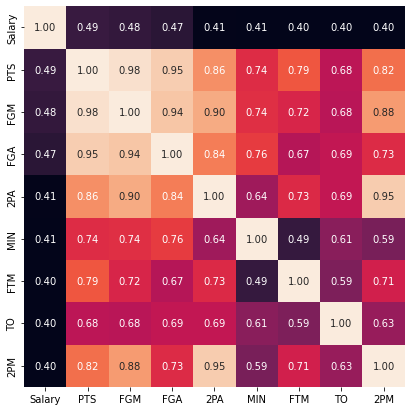

In [19]:
#function that creates heatmaps for the 8 variables that are most strongly correlated with % of Cap for each of the data subsets
def heatMap(df, k):
    corrmat = df.corr(method='pearson', min_periods=1)
    r_square = corrmat ** 2
    ## Top K-1 correlated variables
    cols = r_square.nlargest(k, 'Salary')['Salary'].index
    cm = df[cols].corr()
    cm_square = cm ** 2
    f, ax = plt.subplots(figsize=(7, 7))
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm_square, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
heatMap(player_stats_shoot_salary, 9)

In [20]:
#creating scatter plots to further look at the relationships between % of Cap and other vars
#sns.set()
#sns.pairplot(player_stats_shoot_salary, height=5)
#plt.show()

In [21]:
# Many statistical tests make the assumption that datasets are normally distributed. However, this is often not the case in practice.
# One way to address this issue is to transform the distribution of values in a dataset using log transformations
player_stats_shoot_salary['Salary'] = np.log(player_stats_shoot_salary['Salary'])
player_stats_shoot_salary

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Salary
0,Nikola Jokic,20,20.0,32.2,23.2,2.0,8.2,10.1,8.9,1.3,0.6,3.3,3.0,2.7,8.7,13.7,63.5,0.8,2.4,34.0,5.0,6.2,80.6,7.9,11.4,69.6,1.693,0.66,17.313466
1,Jamal Murray,19,19.0,29.8,17.9,0.5,3.2,3.7,4.9,0.9,0.3,2.0,1.3,2.5,6.8,15.5,44.2,2.0,5.3,38.0,2.3,2.9,78.2,4.8,10.2,47.4,1.160,0.51,17.270249
2,Michael Porter,16,16.0,29.1,16.4,1.2,4.8,6.0,1.3,0.6,0.4,1.1,2.6,1.1,6.0,12.9,46.6,2.9,6.9,42.7,1.5,1.9,80.0,3.1,6.0,51.0,1.277,0.58,NaN
3,Aaron Gordon,20,20.0,29.2,16.1,2.4,4.3,6.7,2.3,0.7,0.9,1.4,1.8,1.6,6.2,10.2,60.8,1.1,2.8,37.5,2.7,4.2,63.1,5.2,7.4,69.6,1.578,0.66,16.795668
4,Bones Hyland,15,0.0,20.5,14.1,0.3,1.7,1.9,3.3,0.6,0.3,1.8,1.6,1.9,4.6,11.5,39.9,2.7,6.1,43.5,2.2,2.7,80.5,1.9,5.4,35.8,1.220,0.51,14.604659
5,Bruce Brown,23,11.0,30.0,11.2,1.0,3.5,4.5,4.5,1.1,0.5,1.9,2.4,2.4,4.5,9.5,47.2,1.3,3.4,39.7,0.9,1.0,87.5,3.1,6.1,51.4,1.183,0.54,15.684077
6,Kentavious Caldwell-Pope,22,22.0,31.2,11.0,0.5,2.4,2.9,2.1,1.2,0.4,1.3,1.9,1.6,3.9,8.4,45.9,2.1,4.5,46.0,1.1,1.5,78.1,1.8,3.9,45.9,1.303,0.58,16.454904
7,Jeff Green,16,3.0,19.9,7.9,0.8,1.8,2.6,1.2,0.4,0.2,1.0,2.1,1.2,2.9,5.6,52.8,0.3,1.3,25.0,1.8,2.3,77.8,2.6,4.3,60.9,1.427,0.56,15.319588
8,Vlatko Cancar,15,0.0,12.7,5.3,0.3,1.4,1.7,0.9,0.5,0.3,0.5,1.5,1.8,2.0,4.3,46.9,0.9,2.3,41.2,0.4,0.5,85.7,1.1,2.0,53.3,1.250,0.58,14.619465
9,DeAndre Jordan,19,3.0,15.7,5.3,1.6,4.3,5.9,1.0,0.2,0.6,1.3,1.6,0.8,2.3,3.0,75.4,0.1,0.1,100.0,0.7,1.6,46.7,2.2,2.9,75.0,1.772,0.76,14.423149


In [22]:
x = player_stats_shoot_salary[['GP', 'GS', 'MIN', 'PTS', 'OR', 'DR', 'REB', 'AST', 'STL','BLK', 'TO', 'PF', #'AST/TO', 
                              'FGM', 'FGA', 'FG%', '3PM', '3PA','3P%', 'FTM', 'FTA', 'FT%', '2PM', '2PA', '2P%', 'SC-EFF', 'SH-EFF']]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)
#lower VIF factor values means less multicollinearity

,VIF Factor,features
0,15.9,GP
1,7.0,GS
2,77.6,MIN
3,30326.1,PTS
4,744.2,OR
5,5320.8,DR
6,9392.9,REB
7,9.3,AST
8,9.5,STL
9,3.8,BLK


In [23]:
# remove some features from dataframe because their VIF factor values are far too high
DF = player_stats_shoot_salary[['GS', 'PTS', 'REB', 'AST', 'STL','BLK', '3P%', '2P%']]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(DF.values, i) for i in range(DF.shape[1])]
vif["features"] = DF.columns
vif.round(1)

,VIF Factor,features
0,4.6,GS
1,9.6,PTS
2,8.9,REB
3,5.5,AST
4,7.1,STL
5,3.4,BLK
6,3.9,3P%
7,4.8,2P%


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.linear_model import LinearRegression

#target array
y=player_stats_shoot_salary[['Salary']]


#ADVANCED STATS
linreg = LinearRegression()

#Linear regression on all three subsets of data to see which scores the best
x_train, x_test, y_train, y_test=train_test_split(DF, y, test_size=0.2, random_state=123)
linreg.fit(x_train, y_train)
predictions=linreg.predict(x_test)

#cross validate model
predict = cross_val_predict(linreg, DF, y, cv=6)

#get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict, y))
score = metrics.r2_score(y, predict)
print ('Root Mean Squared Error is :', rmse)
print ('R sq is :', score)

#create residual plot
residuals = y - predict
plt.scatter(predict, residuals)
plt.xlabel('Predictions for Salary')
plt.ylabel('Residual Values')
plt.title('Residual Plotusing Linear Regression Model')
plt.show()

#that's the subsection that I will be using to look at overvalued and undervalued players
#positive residual=overvalued, negative=undervalued
player_stats_shoot_salary['Predicted Salary']=predict
player_stats_shoot_salary['Residuals']=residuals
player_stats_shoot_salary['Resid %']=(player_stats_shoot_salary['Residuals']/player_stats_shoot_salary['Salary']*100)

In [24]:
copy=player_stats_shoot_salary
copy=copy[['Name','GS', 'PTS', 'REB', 'AST', 'STL','BLK', '3P%', '2P%', 'Salary']] #'Predicted Salary', 'Residuals']]
#copy=copy.sort_values('Residuals')
#get top25 most undervalued players

top25=copy[:25]
top25


,Name,GS,PTS,REB,AST,STL,BLK,3P%,2P%,Salary
0,Nikola Jokic,20.0,23.2,10.1,8.9,1.3,0.6,34.0,69.6,17.313466
1,Jamal Murray,19.0,17.9,3.7,4.9,0.9,0.3,38.0,47.4,17.270249
2,Michael Porter,16.0,16.4,6.0,1.3,0.6,0.4,42.7,51.0,NaN
3,Aaron Gordon,20.0,16.1,6.7,2.3,0.7,0.9,37.5,69.6,16.795668
4,Bones Hyland,0.0,14.1,1.9,3.3,0.6,0.3,43.5,35.8,14.604659
5,Bruce Brown,11.0,11.2,4.5,4.5,1.1,0.5,39.7,51.4,15.684077
6,Kentavious Caldwell-Pope,22.0,11.0,2.9,2.1,1.2,0.4,46.0,45.9,16.454904
7,Jeff Green,3.0,7.9,2.6,1.2,0.4,0.2,25.0,60.9,15.319588
8,Vlatko Cancar,0.0,5.3,1.7,0.9,0.5,0.3,41.2,53.3,14.619465
9,DeAndre Jordan,3.0,5.3,5.9,1.0,0.2,0.6,100.0,75.0,14.423149


In [25]:
GSMean=top25['GS'].mean()
print ('Average Game Started is:',GSMean)

PTSMean=top25['PTS'].mean()
print ('Average Point is:',PTSMean)

REBMean=top25['REB'].mean()
print ('Average Rebounds is:',REBMean)

ASTMean=top25['AST'].mean()
print ('Average Assists is:',ASTMean)

STLMean=top25['STL'].mean()
print ('Average Steals is:',STLMean)

BLKMean=top25['BLK'].mean()
print ('Average Blocks is:',BLKMean)

P3Mean=top25['3P%'].mean()
print ('Average Three-Point Field Goals Percentage is:',P3Mean)

P2Mean=top25['2P%'].mean()
print ('Average Two-Point Field Goals Percentage is:',P2Mean)

SalaryMean=top25['Salary'].mean()
print ('Average Salary in log is:',SalaryMean)

#residMean=bottom25['Residuals'].mean()
#print ('Average absolute value Residual is:',-1*residMean, '%')

Average Game Started is: 9.04
Average Point is: 10.416000000000002
Average Rebounds is: 3.928
Average Assists is: 2.364
Average Steals is: 0.664
Average Blocks is: 0.4919999999999999
Average Three-Point Field Goals Percentage is: 34.11599999999999
Average Two-Point Field Goals Percentage is: 53.135999999999996
Average Salary in log is: 15.659095427287019


In [26]:
#hist=top25.hist(column='Residuals')

In [27]:
#get most overvalued players by residuals
bottom25=copy[-25:]
bottom25

,Name,GS,PTS,REB,AST,STL,BLK,3P%,2P%,Salary
199,Devonte' Graham,0.0,5.8,1.5,2.2,0.5,0.3,39.6,25.0,16.262196
200,Dyson Daniels,2.0,5.3,3.9,2.2,0.7,0.3,40.9,55.0,15.521821
201,Willy Hernangomez,0.0,5.2,4.0,0.5,0.3,0.2,0.0,53.1,14.708975
202,Garrett Temple,0.0,2.9,0.7,0.3,0.7,0.1,38.5,44.4,15.406784
203,Jaxson Hayes,0.0,1.1,1.8,0.6,0.3,0.1,0.0,37.5,15.732876
204,Dereon Seabron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
205,Devin Vassell,17.0,20.5,4.2,3.6,0.7,0.4,41.8,48.8,15.305489
206,Keldon Johnson,22.0,20.4,5.1,3.1,0.9,0.1,34.6,43.3,15.169546
207,Jakob Poeltl,20.0,12.9,9.9,3.5,0.9,1.0,0.0,64.0,16.056023
208,Tre Jones,23.0,12.1,3.4,6.9,1.5,0.2,30.5,45.0,14.393595


In [28]:
GSMean=bottom25['GS'].mean()
print ('Average Game Started is:',GSMean)

PTSMean=bottom25['PTS'].mean()
print ('Average Point is:',PTSMean)

REBMean=bottom25['REB'].mean()
print ('Average Rebounds is:',REBMean)

ASTMean=bottom25['AST'].mean()
print ('Average Assists is:',ASTMean)

STLMean=bottom25['STL'].mean()
print ('Average Steals is:',STLMean)

BLKMean=bottom25['BLK'].mean()
print ('Average Blocks is:',BLKMean)


P3Mean=bottom25['3P%'].mean()
print ('Average Three-Point Field Goals Percentage is:',P3Mean)

P2Mean=bottom25['2P%'].mean()
print ('Average Two-Point Field Goals Percentage is:',P2Mean)

SalaryMean=bottom25['Salary'].mean()
print ('Average Salary in log is:',SalaryMean)

#residMean=bottom25['Residuals'].mean()
#print ('Average absolute value Residual is:',-1*residMean, '%')

Average Game Started is: 4.88
Average Point is: 7.152
Average Rebounds is: 3.0599999999999996
Average Assists is: 1.9400000000000004
Average Steals is: 0.48800000000000004
Average Blocks is: 0.30400000000000005
Average Three-Point Field Goals Percentage is: 25.427999999999997
Average Two-Point Field Goals Percentage is: 51.852
Average Salary in log is: 15.204760116481433


In [29]:
#graph=bottom25.hist(column='Residuals')

The most undervalued players are mostly young, up and coming stars who are still on their rookie contracts, and therefore don’t take up much salary cap room. The most overvalued players were mostly in their prime superstars who were paid accordingly.

Conclusions
The two main conclusions from my analysis are as follows:

As obvious as it seems, players who score more points and make more field goals are going to be paid a higher salary, and that is why the regular subcategory produced a better model than the advanced model, which was the subcategory that I thought was going to produce the best model.
Teams who placed a higher value on their players than what the market would dictate they were worth actually had more team success. This is most likely to contributed to the presence of star players on these teams, which the model tended to view as overvalued.